# Hermit Fold 1

In [1]:
import os
from collections import Counter

import pandas as pd

from leaderboard.utils import rasa_utils, eda_utils

## Load Data

In [2]:
data_path = "../../../../training-data/public/HERMIT/KFold_1"

In [3]:
dfs= {split : eda_utils.load_nlu_data(os.path.join(data_path, split, f'{split}.yml')) for split in ['train', 'test']}

/Users/kabu/Documents/workspace/rasa2/rasa/shared/utils/io.py:98: UserWarning: Training data file /Users/kabu/Documents/workspace/training-data/public/HERMIT/KFold_1/train/train.yml has a lower format version than your Rasa Open Source installation: 2.0 < 3.1. Rasa Open Source will read the file as a version 3.1 file. Please update your version key to 3.1. See https://rasa.com/docs/rasa/training-data-format.
/Users/kabu/Documents/workspace/rasa2/rasa/shared/utils/io.py:98: UserWarning: Training data file /Users/kabu/Documents/workspace/training-data/public/HERMIT/KFold_1/test/test.yml has a lower format version than your Rasa Open Source installation: 2.0 < 3.1. Rasa Open Source will read the file as a version 3.1 file. Please update your version key to 3.1. See https://rasa.com/docs/rasa/training-data-format.


## Intents

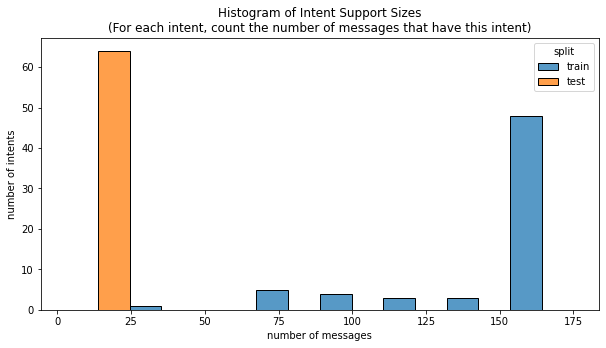

In [4]:
intent_support = eda_utils.intent_support(dfs)

In [5]:
type(intent_support['train'])

pandas.core.frame.DataFrame

In [6]:
pd.DataFrame(intent_support['train'])

,intent,message_count
0,alarm_query,175
1,play_radio,175
2,iot_hue_lightoff,175
3,lists_createoradd,175
4,lists_query,175
...,...,...
59,email_addcontact,79
60,audio_volume_down,72
61,music_settings,70
62,iot_wemo_on,69


In [7]:
intent_support['test']

,intent,message_count
0,alarm_query,19
1,iot_coffee,19
2,iot_hue_lightoff,19
3,lists_createoradd,19
4,lists_query,19
...,...,...
59,datetime_convert,8
60,audio_volume_down,8
61,music_settings,7
62,iot_wemo_on,7


## Entities

### Entities per Message

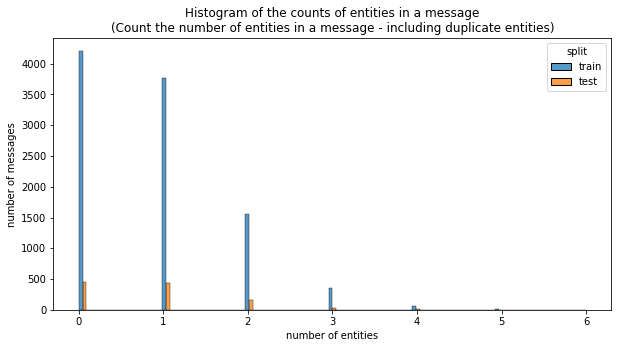

In [8]:
eda_utils.entities_per_message(dfs)

In [9]:
dfs['train']['num_entities'].value_counts()

0    4208
1    3768
2    1555
3     351
4      69
5       8
6       1
Name: num_entities, dtype: int64

In [10]:
dfs['test']['num_entities'].value_counts()

0    447
1    431
2    153
3     37
4      8
Name: num_entities, dtype: int64

### Messages per Entity

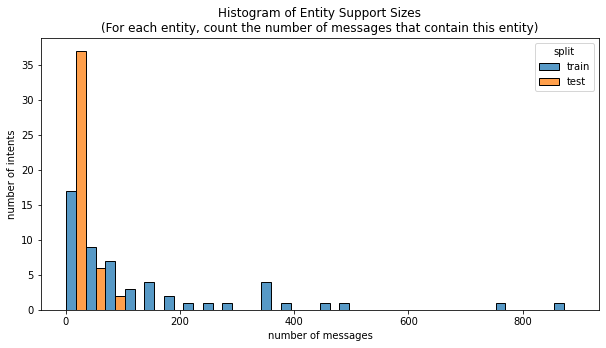

In [11]:
entity_support = eda_utils.entity_support(dfs)

In [12]:
entity_support['train'].head(10)

,entity,message_count
0,date,889
11,place_name,765
2,time,493
7,person,462
16,business_name,392
8,media_type,364
50,transport_type,360
4,event_name,351
5,device_type,350
18,food_type,292


In [13]:
entity_support['train'].tail(10)

,entity,message_count
17,ingredient,15
3,alarm_type,14
47,movie_type,13
51,transport_descriptor,11
39,audiobook_author,10
20,cooking_type,10
52,transport_name,10
19,drink_type,6
41,game_type,1
36,music_album,1
